In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

matches = pd.read_csv("mod_matches.csv")
matches.head()


,Home,Away,League,Date,Matches,goalA,goalsB,possA,possB,cornerA,...,yell_cardA,yell_cardB,red_cardA,red_cardB,foulA,foulB,foul_againstA,foul_againstB,offideA,offsideB
0,Brentford,Arsenal,Premier League,13.08.2021,Matchday 1,2,0,35,65,2,...,0,0,0,0,12,8,7,12,1,1
1,Everton,Southampton,Premier League,14.08.2021,Matchday 1,3,1,48,52,6,...,2,0,0,0,13,15,15,11,0,0
2,Watford,Aston Villa,Premier League,14.08.2021,Matchday 1,3,2,38,62,2,...,3,1,0,0,18,13,13,18,0,2
3,Burnley,Brighton & Hove Albion,Premier League,14.08.2021,Matchday 1,1,2,36,64,6,...,2,1,0,0,8,5,5,8,1,0
4,Chelsea,Crystal Palace,Premier League,14.08.2021,Matchday 1,3,0,63,37,5,...,0,0,0,0,15,11,11,15,0,1


In [3]:
matches.shape
matches["Home"] = matches["Home"].str.strip()
matches["Home"].value_counts()

Home
Tottenham Hotspur          54
Liverpool                  53
Manchester City            53
Brighton & Hove Albion     52
Aston Villa                52
Wolverhampton Wanderers    51
West Ham United            51
Chelsea                    50
Brentford                  49
Arsenal                    49
Crystal Palace             48
Newcastle United           47
Everton                    47
Manchester United          46
Southampton                35
Leeds United               34
Nottingham Forest          34
Leicester City             34
Bournemouth                34
Fulham                     32
Burnley                    31
Norwich City               18
Watford                    17
Sheffield United           15
Luton Town                 15
Name: count, dtype: int64

In [ ]:
matches[matches["Home"] == "Chelsea"]

In [ ]:
matches["date"]= pd.to_datetime(matches["Date"])
matches.dtypes

In [ ]:
matches[matches["Home"] == "Chelsea"].sort_values("date")

In [6]:
del matches["Date"]
matches.shape

(1001, 51)

In [ ]:
matches.dtypes

In [ ]:
# creating target columns and populating with W, L, D depending on their condition 
matches.loc[matches['goalA'] > matches['goalsB'], 'target'] = 'W'
matches.loc[matches['goalA'] < matches['goalsB'], 'target'] = 'L'
matches.loc[matches['goalA'] == matches['goalsB'], 'target'] = 'D'
matches

In [ ]:
matches["result"] = matches["target"].astype("category").cat.codes+1
matches

In [ ]:
matches['Year'] = matches.date.dt.year
matches['Month'] = matches.date.dt.month
matches['DayofWeeks'] = matches.date.dt.dayofweek
matches['DayofYear'] = matches.date.dt.dayofyear
matches.head()

In [ ]:
for label, content in matches.items():
    if pd.api.types.is_string_dtype(content):
        #matches[label] = content.str.strip()
        print(label, ":", content.dtype)

In [10]:
for label, content in matches.items():
    if pd.api.types.is_string_dtype(content):
        matches[label] = content.astype("category").cat.as_ordered()

In [ ]:
matches.info()

In [33]:
#check for null
for label, content in matches.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label, ":", content.isnull().sum())

In [12]:
# converting categorical columns to numerical codes
for label, content in matches.items():
    if not pd.api.types.is_numeric_dtype(content):
        matches[label] = pd.Categorical(content).codes+1

In [38]:
matches

,Home,Away,League,Matches,goalA,goalsB,possA,possB,cornerA,cornerB,...,foul_againstB,offideA,offsideB,date,target,result,Year,Month,DayofWeeks,DayofYear
0,4,1,1,1,2,0,35,65,2,5,...,12,1,1,1,3,3,2021,8,4,225
1,9,21,1,1,3,1,48,52,6,8,...,11,0,0,2,3,3,2021,8,5,226
2,23,2,1,1,3,2,38,62,2,4,...,18,0,2,2,3,3,2021,8,5,226
3,6,5,1,1,1,2,36,64,6,6,...,8,1,0,2,2,2,2021,8,5,226
4,7,8,1,1,3,0,63,37,5,2,...,15,0,1,2,3,3,2021,8,5,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1,14,1,25,2,0,58,42,3,1,...,11,1,1,326,3,3,2024,4,2,94
997,4,5,1,25,0,0,40,60,1,5,...,8,3,0,326,1,1,2024,4,2,94
998,15,2,1,25,4,1,69,31,2,3,...,6,1,1,326,3,3,2024,4,2,94
999,13,20,1,25,3,1,83,17,13,1,...,6,0,1,327,3,3,2024,4,3,95


In [40]:
# From scikit-Learn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_df = matches[matches.index < 900]
test_df = matches[matches.index >= 900]
X_train = train_df.drop(["target", "result", "date"], axis=1)
Y_train = train_df["target"]
X_train
mtest = test_df.drop(["target", "result", "date"], axis=1)
mtest

,Home,Away,League,Matches,goalA,goalsB,possA,possB,cornerA,cornerB,...,foulA,foulB,foul_againstA,foul_againstB,offideA,offsideB,Year,Month,DayofWeeks,DayofYear
900,17,15,1,14,2,3,27,73,3,13,...,7,7,7,7,8,1,2024,1,5,13
901,9,2,1,14,0,0,31,69,4,5,...,13,14,14,13,5,1,2024,1,6,14
902,16,22,1,14,2,2,37,63,8,13,...,8,5,5,8,3,4,2024,1,6,14
903,1,8,1,14,5,0,61,39,6,7,...,8,12,12,7,5,2,2024,1,5,20
904,4,19,1,14,3,2,24,76,6,4,...,10,14,14,10,0,2,2024,1,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1,14,1,25,2,0,58,42,3,1,...,12,8,8,11,1,1,2024,4,2,94
997,4,5,1,25,0,0,40,60,1,5,...,9,12,11,8,3,0,2024,4,2,94
998,15,2,1,25,4,1,69,31,2,3,...,6,13,13,6,1,1,2024,4,2,94
999,13,20,1,25,3,1,83,17,13,1,...,6,9,8,6,0,1,2024,4,3,95


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, random_state=100, max_features=9)
model.fit(X_train, Y_train)


Y_pred = model.predict(test_df.drop(["target", "result", "date"], axis=1))
print(Y_pred)
accuracy = accuracy_score(test_df["target"], Y_pred)
print(f"Model accuracy: {accuracy:.2f}")

[2 1 1 3 3 1 2 1 2 3 1 3 2 3 3 3 1 1 1 1 3 3 2 3 2 1 3 2 3 3 2 3 3 2 2 2 2
 2 2 1 2 3 2 2 1 2 2 1 3 2 3 1 3 2 3 3 3 3 3 1 3 2 2 2 2 3 2 3 1 3 1 3 2 3
 1 1 3 3 1 3 1 3 1 1 1 3 3 3 1 3 1 3 1 1 3 1 3 1 3 3 3]
Model accuracy: 0.98


In [ ]:
#test_df = test_df.drop(["target", "result", "date"], axis=1)
text_1000 = test_df[test_df.index == 1000]
text_1000

,Home,Away,League,Matches,goalA,goalsB,possA,possB,cornerA,cornerB,...,foulA,foulB,foul_againstA,foul_againstB,offideA,offsideB,Year,Month,DayofWeeks,DayofYear
1000,7,16,1,25,4,3,56,44,12,3,...,7,15,13,7,3,0,2024,4,3,95


In [35]:
Y_pred_1000 = model.predict(text_1000)
Y_pred_1000

array([3], dtype=int8)

In [36]:
import sklearn
print(sklearn.__version__)

1.7.0


In [43]:
learning_rate = [0.2,0.15,0.1,0.05,0.01]
array_accuracy = []
nMax_features = [1,2,3,4,5,6,7,8,9,10]

test_df_x = test_df.drop(["target", "result", "date"], axis=1)
test_df_y = test_df['target']
for lr in learning_rate:
    print(f"Training model with learning rate: {lr}")
    for mx in nMax_features:
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, random_state=100, max_features=mx)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(test_df_x)
        accuracy = accuracy_score(test_df_y, Y_pred)
        array_accuracy.append(accuracy)
        print(f"Model accuracy with learning rate {lr} and max_features {mx}: {accuracy:.2f}")
print(array_accuracy)

Training model with learning rate: 0.2
Model accuracy with learning rate 0.2 and max_features 1: 0.75
Model accuracy with learning rate 0.2 and max_features 2: 0.78
Model accuracy with learning rate 0.2 and max_features 3: 0.92
Model accuracy with learning rate 0.2 and max_features 4: 0.91
Model accuracy with learning rate 0.2 and max_features 5: 0.92
Model accuracy with learning rate 0.2 and max_features 6: 0.96
Model accuracy with learning rate 0.2 and max_features 7: 0.96
Model accuracy with learning rate 0.2 and max_features 8: 0.96
Model accuracy with learning rate 0.2 and max_features 9: 0.97
Model accuracy with learning rate 0.2 and max_features 10: 0.96
Training model with learning rate: 0.15
Model accuracy with learning rate 0.15 and max_features 1: 0.75
Model accuracy with learning rate 0.15 and max_features 2: 0.85
Model accuracy with learning rate 0.15 and max_features 3: 0.88
Model accuracy with learning rate 0.15 and max_features 4: 0.92
Model accuracy with learning rate 

In [44]:
learning_rate = [0.2,0.15,0.1,0.05,0.01]
array_accuracy = []

test_df_x = test_df.drop(["target", "result", "date"], axis=1)
for lr in learning_rate:
    print(f"Training model with learning rate: {lr}")
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, random_state=100, max_features=9)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(test_df_x)
    accuracy = accuracy_score(test_df["target"], Y_pred)
    array_accuracy.append(accuracy)
    print(f"Model accuracy with learning rate {lr} and max_features {mx}: {accuracy:.2f}")
print(array_accuracy)

Training model with learning rate: 0.2
Model accuracy with learning rate 0.2 and max_features 10: 0.97
Training model with learning rate: 0.15
Model accuracy with learning rate 0.15 and max_features 10: 0.98
Training model with learning rate: 0.1
Model accuracy with learning rate 0.1 and max_features 10: 0.97
Training model with learning rate: 0.05
Model accuracy with learning rate 0.05 and max_features 10: 0.94
Training model with learning rate: 0.01
Model accuracy with learning rate 0.01 and max_features 10: 0.66
[0.9702970297029703, 0.9801980198019802, 0.9702970297029703, 0.9405940594059405, 0.6633663366336634]


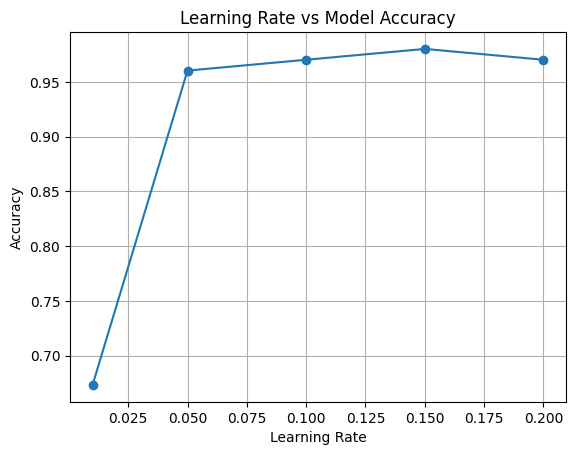

In [80]:
# plot graph of learning rate vs accuracy
import matplotlib.pyplot as plt
plt.plot(learning_rate, array_accuracy, marker= 'o')
plt.title("Learning Rate vs Model Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_features=5)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(test_df.drop(["target", "result", "date"], axis=1))
accuracy = accuracy_score(test_df["target"], Y_pred)
# array_accuracy.append(accuracy)
print(f"Model accuracy with Random Forest: {accuracy:.2f}")

Model accuracy with Random Forest: 0.86


In [46]:
max_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimator = [50, 100, 150, 200, 250]
for mf in max_features:
    for ne in n_estimator:
        rf = RandomForestClassifier(n_estimators=100, random_state=100, max_features=5)
        rf.fit(X_train, Y_train)
        Y_pred = rf.predict(test_df.drop(["target", "result", "date"], axis=1))
        accuracy = accuracy_score(test_df["target"], Y_pred)
        # array_accuracy.append(accuracy)
        print(f"Model accuracy with Random Forest: {accuracy:.2f}")
        print(f"Model accuracy with n_estimator {ne} and max_features {mf}: {accuracy:.2f}")

Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 50 and max_features 1: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 100 and max_features 1: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 150 and max_features 1: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 200 and max_features 1: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 250 and max_features 1: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 50 and max_features 2: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 100 and max_features 2: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 150 and max_features 2: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 200 and max_features 2: 0.86
Model accuracy with Random Forest: 0.86
Model accuracy with n_estimator 250 and max_features 

In [47]:
# Create table of actual vs predicted  aka confusion matrix
combined = pd.DataFrame(dict(actual=test_df["target"], predicted=Y_pred))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])
# rownames=["Actual"], colnames=["predicted"]

predicted,1,2,3
actual,,,
1,17,12,1
2,0,27,1
3,0,0,43


In [48]:
from sklearn.ensemble import RandomForestClassifier
kmodel= RandomForestClassifier(n_estimators=100, random_state=100, max_features=5)
kmodel.fit(X_train, Y_train)
data = mtest[ mtest.index == 1000 ]
print(data)
Y_pred = kmodel.predict(data)
print(f"prediction fo match 1000: {Y_pred[0]}")

      Home  Away  League  Matches  goalA  goalsB  possA  possB  cornerA  \
1000     7    16       1       25      4       3     56     44       12   

      cornerB  ...  foulA  foulB  foul_againstA  foul_againstB  offideA  \
1000        3  ...      7     15             13              7        3   

      offsideB  Year  Month  DayofWeeks  DayofYear  
1000         0  2024      4           3         95  

[1 rows x 54 columns]
prediction fo match 1000: 3
